<a href="https://colab.research.google.com/github/NewburghCat/dalmatians_sales/blob/main/DataSet_Prj_P_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JodyAnn Bradford

Project 2: E-Commerce DataSet 

August 19th 2022.


In [27]:
# Project_2 : Data Set - E-Commerce Data 

This Data was chosen to facilitate an anaylsis which predicts a revelant product type according to the region and shipping. 

Description: 

An international e-commerce company based customer insight data. This company sells electronic products. 
 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# load data 

file = '/content/drive/MyDrive/Colab Notebooks/Project 2/Train_E-CommerceShippingData.csv'
df = pd.read_csv(file)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Data Cleaning 

In [31]:
# Checking for duplicates 

df.duplicated().sum()

0

No duplicates found 

In [32]:
# Checking data types 

df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No Missing values 

The unnecessary column is 'ID'. It has been dropped. 

In [33]:
# Deleting unnecessary columns
df = df.drop(columns=['ID'])
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [34]:
# create a dtype filter to be used to count their values 

dtypes = df.dtypes
header_columns = dtypes[dtypes=='object'].index
header_columns

for all in header_columns:
  print(f'- column= {all}')
  print(df[all].value_counts(dropna=False))
  print('\n\n')

- column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





In [35]:
# Convert the string value columms to numeric values

df['Warehouse_block'] = df['Warehouse_block'].replace({'A':0, 'B': 1, 'C':2, 'D':3, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace({'Ship':0, 'Flight': 1, 'Road':2})
df['Product_importance'] = df['Product_importance'].replace({'low':0, 'medium': 1, 'high':2})
df['Gender'] = df['Gender'].replace({'F':0, 'M': 1})

In [36]:
# Checking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


In [37]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,0.481589,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.754813,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,0.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


Feature Data Types

Numeric Features: Warehouse_block, Mode_of_Shipment, Product_Importance, Discount_offered

Nominal/Categorical Features: 8 Columns 

Preprocessor

A. OneHotEncoder 
B. Scaler to scale different scales. 

* No Missing values 

In [38]:

## Make a column selector for categories & test it 

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [39]:
## Instantiate OneHotEncoder and StandardScaler

ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

## Create tuples of (transformer, selector) - ColumnTransformer

cat_tuple = (ohe_encoder, cat_selector)
num_tuple = (scaler, num_selector)

In [40]:
## ColumnTransformer

preprocessor = make_column_transformer(cat_tuple, num_tuple)

Modeling

In [41]:

df['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

Visualization

           1.Cluster Metrics


In [42]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(df)

Text(0, 0.5, 'inertia')

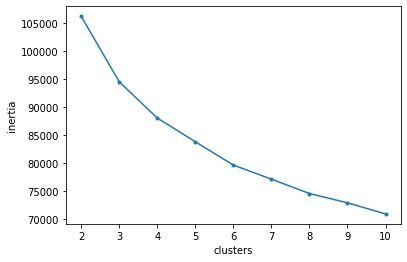

In [43]:
#Create an empty list of inertias
inertias = []

#Loop through k values between 2 and 10 and store the inertias in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
    
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Silhouette Score for KMeans

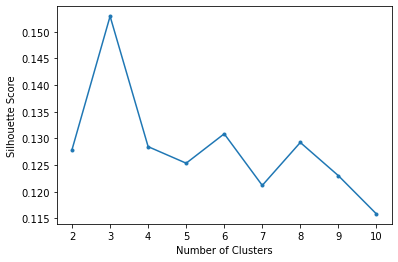

In [44]:

# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


In [45]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.1279006254384768

In [46]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

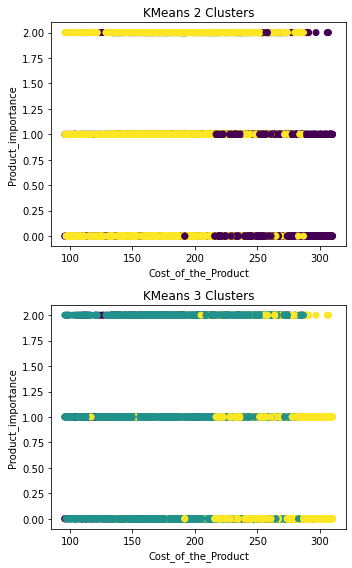

In [47]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_

# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Cost_of_the_Product'], df['Product_importance'], c = df['cluster2'])
axes[0].set_xlabel('Cost_of_the_Product')
axes[0].set_ylabel('Product_importance')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Cost_of_the_Product'], df['Product_importance'], c = df['cluster3'])
axes[1].set_xlabel('Cost_of_the_Product')
axes[1].set_ylabel('Product_importance')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();


The Product importance clusters a slowly knitted together. This visual doesn't give a clear depiction of clusters but the longiviity of the cluster is highlighted. 

DBSCAN

In [48]:
# Create Dataset
circles = make_circles(n_samples=1000, noise=.15, factor=.1, random_state=42)[0]
circles[:5]

array([[ 0.00624286,  0.14012181],
       [ 0.06728077,  0.13200944],
       [-0.20771233,  0.37761054],
       [-0.30811441, -0.06441166],
       [ 0.46257516, -0.88599616]])

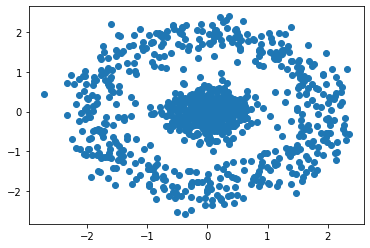

In [49]:
# Scale data

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
circles = scaler.fit_transform(circles)
plt.scatter(circles[:,0], circles[:,1])

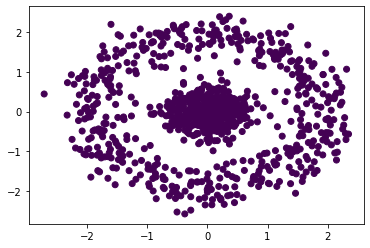

In [50]:
db = DBSCAN()
db.fit(circles)
plt.scatter(circles[:,0], circles[:, 1], c=db.labels_);

Creating a Neighbors using NearestNeighbors

In [51]:
min_samples = 30
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(circles)
distances, indices = neighbors.kneighbors(circles)
distances[:10]

array([[0.        , 0.03317269, 0.03684657, 0.03843617, 0.04554815,
        0.05305751, 0.06605228, 0.06636566, 0.06666659, 0.06791302,
        0.06838348, 0.07565918, 0.08259865, 0.08645387, 0.09075917,
        0.09190577, 0.09250838, 0.09312995, 0.09721234, 0.10403576,
        0.10455409, 0.10536827, 0.10575804, 0.11078478, 0.11428904,
        0.11979502, 0.12391841, 0.13253847, 0.13619637, 0.13887324],
       [0.        , 0.02141877, 0.02190873, 0.0525583 , 0.0620055 ,
        0.07445293, 0.07513315, 0.0866166 , 0.08930404, 0.08980387,
        0.0967244 , 0.10350215, 0.10375638, 0.10582193, 0.10678505,
        0.11096156, 0.11245924, 0.11473956, 0.11562288, 0.11716108,
        0.1175627 , 0.11979502, 0.12027194, 0.12414835, 0.12452808,
        0.12590542, 0.12665272, 0.12719884, 0.12999266, 0.13435909],
       [0.        , 0.04395657, 0.28586353, 0.28688404, 0.30905073,
        0.30977458, 0.3160105 , 0.32505776, 0.32710425, 0.33892991,
        0.3436514 , 0.34500361, 0.34906258, 0.

In [52]:
sorted_distances = np.sort(distances[:, min_samples-1])

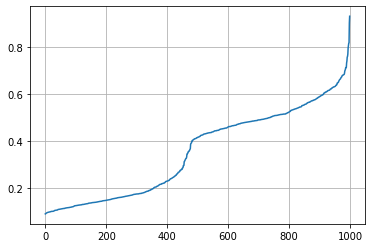

In [53]:
plt.plot(sorted_distances)
plt.grid();

Here the distance peaks at 425.

In [54]:
# Fit the tuned DBSCAN
# min_samples = 30 and eps = .3

# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 0.3, min_samples = min_samples).fit(circles)

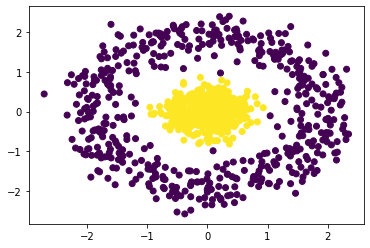

In [55]:
plt.scatter(circles[:,0], circles[:,1], c=dbs.labels_);

The min_samples were set a 30 and the correlation of all columns seems to be slowly clustered together working positively for the product to reach the customer on time. 

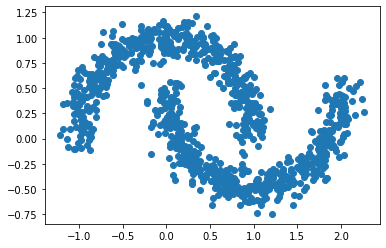

In [56]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000,                   noise=.1,                  
random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])

In [57]:
moons = StandardScaler().fit_transform(moons)

In [58]:
# Find a good value for epsilon
min_samples=30
n_neighbors = NearestNeighbors(n_neighbors=min_samples)
n_neighbors.fit(moons)
distances, indices= n_neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

In [59]:
sorted_distances = np.sort(distances[:, min_samples-1])
sorted_distances[:5]

array([0.14650369, 0.14797938, 0.14803976, 0.15245298, 0.15395415])

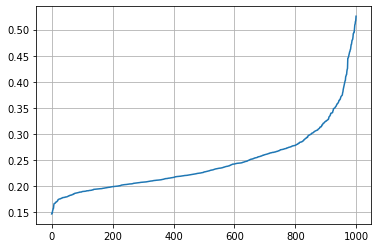

In [60]:
plt.plot(sorted_distances)
plt.grid();

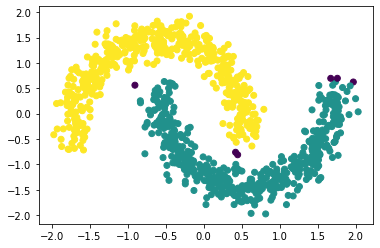

In [61]:
# for min_samples = 30, it looks like .3 might ba a good epsilon, as the elbow seems to begin there.

dbs = DBSCAN(min_samples=min_samples, eps=.3)
dbs.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_)

Here as well, the moons forcast only two clusters yellow and green in relation to the columns in the data frame. 

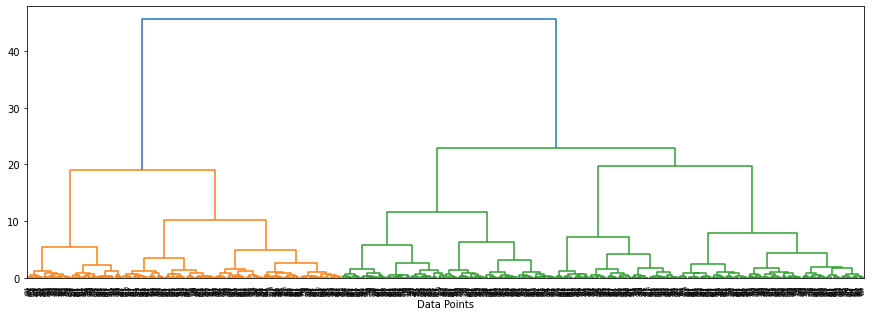

In [62]:
# Agglomerative Clustering
# Visualize Dendrogram

plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');

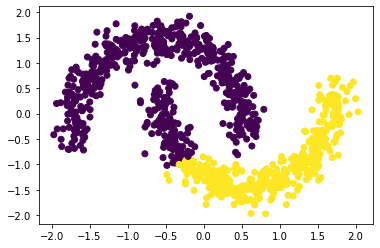

In [63]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);

Overall the working of all columns play a pitoval role in the product reaching the customer on time but with close examination of the Agglomerative clustering in comparison to the tuned DBSCAN one would suggest a balance set a variables are within the data to give adequate information about the product and arrival time to the customer. 